In [1]:
!pip install yfinance

PermissionError: [WinError 5] Access is denied

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import datetime
import seaborn as sns
sns.set_style('whitegrid')
from plotly.subplots import make_subplots

In [2]:
yf.__version__

'0.2.51'

In [3]:
# Define stock tickers and date range
tickers = ['PG', 'JNJ',
           '^GSPC']
start_date = '2010-03-02'
end_date = '2024-02-28'

# Fetch data
stock_data = {}
for ticker in tickers:
    stock_data[ticker] = yf.download(ticker, start=start_date, end=end_date)
    print(f"Downloaded {ticker}")

# Save individual CSVs (optional)
for ticker, data in stock_data.items():
   data.to_csv(f"{ticker}_data.csv")


*********************100%***********************]  1 of 1 completed

Downloaded PG



*********************100%***********************]  1 of 1 completed

Downloaded JNJ



*********************100%***********************]  1 of 1 completed

Downloaded ^GSPC


In [4]:
# Convert 'Date' column to datetime objects with UTC timezone and extract the date
for ticker, data in stock_data.items():
    # The index is already a DatetimeIndex, so we can access the date directly
    data['Date'] = data.index.date
    stock_data[ticker] = data.set_index('Date')  # Set 'Date' as index for each stock DataFrame

In [5]:
#Fetch data for PG
pg_data = stock_data['PG']
pg_data = pg_data.xs('PG',axis=1,level='Ticker')
pg_data.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2010-03-02,41.147190,41.250526,40.908226,41.153650,8004000
2010-03-03,41.043850,41.269899,40.966348,41.114894,8608300
2010-03-04,41.121346,41.431356,40.953425,41.108431,8600300
2010-03-05,41.134262,41.192389,40.720918,41.134262,10101100
2010-03-08,40.811356,41.121364,40.708019,41.043863,11293300


In [6]:
# Fetch data for JNJ
jnj_data = stock_data['JNJ']
jnj_data = jnj_data.xs('JNJ',axis=1,level='Ticker')
jnj_data.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2010-03-02,41.169701,41.299492,40.897141,41.085338,9014000
2010-03-03,41.143753,41.370886,41.026941,41.267054,9360400
2010-03-04,41.254066,41.338431,41.124275,41.228108,8067200
2010-03-05,41.559074,41.578542,41.241085,41.312471,10633600
2010-03-08,41.662914,41.799199,41.546102,41.585043,33380500


In [7]:
# Fetch data for'^GSPC'
gspc_data = stock_data['^GSPC']
gspc_data = gspc_data.xs('^GSPC',axis=1,level='Ticker')
gspc_data.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2010-03-02,1118.310059,1123.459961,1116.510010,1117.010010,4134680000
2010-03-03,1118.790039,1125.640015,1116.579956,1119.359985,3951320000
2010-03-04,1122.969971,1123.729980,1116.660034,1119.119995,3945010000
2010-03-05,1138.699951,1139.380005,1125.119995,1125.119995,4133000000
2010-03-08,1138.500000,1141.050049,1136.770020,1138.400024,3774680000


Feature Engineering:

Computing the stocks the "Returns" feature

Creating a “Tomorrow” column

Creating a “stocks-Direction” column

Computing the Return, Tomorrow, and Stock_Direction columns for each stocks

In [8]:
# For PG stock
pg_data['Return'] = pg_data['Close'].pct_change()
# For PG stock:
pg_data['Tomorrow'] = pg_data['Close'].shift(-1)
# For PG stock
pg_data['Stocks_Direction'] = (pg_data['Close'] > pg_data['Close'].shift(1)).astype(int)

In [9]:
pg_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3522 entries, 2010-03-02 to 2024-02-27
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Close             3522 non-null   float64
 1   High              3522 non-null   float64
 2   Low               3522 non-null   float64
 3   Open              3522 non-null   float64
 4   Volume            3522 non-null   int64  
 5   Return            3521 non-null   float64
 6   Tomorrow          3521 non-null   float64
 7   Stocks_Direction  3522 non-null   int32  
dtypes: float64(6), int32(1), int64(1)
memory usage: 233.9+ KB


In [10]:
#pg_data.dropna(inplace=True)  # Removes rows with any missing values

In [11]:
# Handling 'Return' column NaNs
pg_data.loc[:, 'Return'] = pg_data['Return'].fillna(0)  # Fill first row with 0
pg_data.loc[:, 'Return'] = pg_data['Return'].ffill()  # Fill other potential NaNs using forward fill

# Handling 'Tomorrow' column NaNs
pg_data = pg_data.iloc[:-1]  # Drop the last row

# Handing "Stock_Direction column NaNs"
pg_data.loc[:, 'Stocks_Direction'] = pg_data['Stocks_Direction'].fillna(0)  # Fill first row with 0
pg_data.loc[:, 'Stocks_Direction'] = pg_data['Stocks_Direction'].ffill()  # Fill other potential NaNs using forward fill


In [12]:
pg_data.isna().sum()

Price
Close               0
High                0
Low                 0
Open                0
Volume              0
Return              0
Tomorrow            0
Stocks_Direction    0
dtype: int64

In [13]:
pg_data.head()

Price,Close,High,Low,Open,Volume,Return,Tomorrow,Stocks_Direction
Date,,,,,,,,
2010-03-02,41.147190,41.250526,40.908226,41.153650,8004000,0.000000,41.043850,0
2010-03-03,41.043850,41.269899,40.966348,41.114894,8608300,-0.002511,41.121346,0
2010-03-04,41.121346,41.431356,40.953425,41.108431,8600300,0.001888,41.134262,1
2010-03-05,41.134262,41.192389,40.720918,41.134262,10101100,0.000314,40.811356,1
2010-03-08,40.811356,41.121364,40.708019,41.043863,11293300,-0.007850,40.882389,0


In [14]:
# For JNJ stock
jnj_data['Return'] = jnj_data['Close'].pct_change()
# For JNJ stock:
jnj_data['Tomorrow'] = jnj_data['Close'].shift(-1)
# For JNJ stock
jnj_data['Stocks_Direction'] = (jnj_data['Close'] > jnj_data['Close'].shift(1)).astype(int)


In [15]:
jnj_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3522 entries, 2010-03-02 to 2024-02-27
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Close             3522 non-null   float64
 1   High              3522 non-null   float64
 2   Low               3522 non-null   float64
 3   Open              3522 non-null   float64
 4   Volume            3522 non-null   int64  
 5   Return            3521 non-null   float64
 6   Tomorrow          3521 non-null   float64
 7   Stocks_Direction  3522 non-null   int32  
dtypes: float64(6), int32(1), int64(1)
memory usage: 233.9+ KB


In [16]:
# Handling 'Return' column NaNs
jnj_data.loc[:, 'Return'] = jnj_data['Return'].fillna(0)  # Fill first row with 0
jnj_data.loc[:, 'Return'] = jnj_data['Return'].ffill()  # Fill other potential NaNs using forward fill

# Handling 'Tomorrow' column NaNs
jnj_data = jnj_data.iloc[:-1]  # Drop the last row

# Handing "Stock_Direction' column NaNs
jnj_data.loc[:, 'Stocks_Direction'] = jnj_data['Stocks_Direction'].fillna(0)  # Fill first row with 0
jnj_data.loc[:, 'Stocks_Direction'] = jnj_data['Stocks_Direction'].ffill()

In [17]:
jnj_data.isna().sum()

Price
Close               0
High                0
Low                 0
Open                0
Volume              0
Return              0
Tomorrow            0
Stocks_Direction    0
dtype: int64

In [18]:
jnj_data.head()

Price,Close,High,Low,Open,Volume,Return,Tomorrow,Stocks_Direction
Date,,,,,,,,
2010-03-02,41.169701,41.299492,40.897141,41.085338,9014000,0.000000,41.143753,0
2010-03-03,41.143753,41.370886,41.026941,41.267054,9360400,-0.000630,41.254066,0
2010-03-04,41.254066,41.338431,41.124275,41.228108,8067200,0.002681,41.559074,1
2010-03-05,41.559074,41.578542,41.241085,41.312471,10633600,0.007393,41.662914,1
2010-03-08,41.662914,41.799199,41.546102,41.585043,33380500,0.002499,41.708336,1


In [19]:
# For ^GSPC stock
gspc_data['Return'] = gspc_data['Close'].pct_change()
# For ^GSPC stock:
gspc_data['Tomorrow'] = gspc_data['Close'].shift(-1)
# For ^GSPC stock
gspc_data['Stocks_Direction'] = (gspc_data['Close'] > gspc_data['Close'].shift(1)).astype(int)

In [20]:
gspc_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3522 entries, 2010-03-02 to 2024-02-27
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Close             3522 non-null   float64
 1   High              3522 non-null   float64
 2   Low               3522 non-null   float64
 3   Open              3522 non-null   float64
 4   Volume            3522 non-null   int64  
 5   Return            3521 non-null   float64
 6   Tomorrow          3521 non-null   float64
 7   Stocks_Direction  3522 non-null   int32  
dtypes: float64(6), int32(1), int64(1)
memory usage: 233.9+ KB


In [21]:
gspc_data.loc[:, 'Return'] = gspc_data['Return'].fillna(0)  # Fill first row with 0
gspc_data.loc[:, 'Return'] = gspc_data['Return'].ffill()

gspc_data = gspc_data.iloc[:-1]  # Drop the last row

gspc_data.loc[:, 'Stocks_Direction'] = gspc_data['Stocks_Direction'].fillna(0)
gspc_data.loc[:, 'Stocks_Direction'] = gspc_data['Stocks_Direction'].ffill()

In [22]:
gspc_data.isna().sum()

Price
Close               0
High                0
Low                 0
Open                0
Volume              0
Return              0
Tomorrow            0
Stocks_Direction    0
dtype: int64

In [23]:
gspc_data.head()

Price,Close,High,Low,Open,Volume,Return,Tomorrow,Stocks_Direction
Date,,,,,,,,
2010-03-02,1118.310059,1123.459961,1116.510010,1117.010010,4134680000,0.000000,1118.790039,0
2010-03-03,1118.790039,1125.640015,1116.579956,1119.359985,3951320000,0.000429,1122.969971,1
2010-03-04,1122.969971,1123.729980,1116.660034,1119.119995,3945010000,0.003736,1138.699951,1
2010-03-05,1138.699951,1139.380005,1125.119995,1125.119995,4133000000,0.014007,1138.500000,1
2010-03-08,1138.500000,1141.050049,1136.770020,1138.400024,3774680000,-0.000176,1140.449951,0


Data Preparation, Modelling & Evaluation:

In [24]:
#!pip install mlflow pandas numpy scikit-learn xgboost tensorflow statsmodels


In [25]:
#!pip install --upgrade scikit-learn xgboost


In [26]:
#import xgboost
#print(xgboost.__version__)

In [27]:
# Import necessary modules and the KFold class
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import mlflow
import mlflow.xgboost
import mlflow.keras
from sklearn.model_selection import KFold

In [28]:
#grid_search = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric="mlogloss"),
                           #param_grid, scoring='f1_weighted', cv=5)


In [29]:
X = pg_data[["Close", "High", "Low", "Open", "Volume", "Return"]]  # Features
y = pg_data["Stocks_Direction"]  # Target

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Normalization
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pg_data)

In [32]:
# Initialize and train the XGBoost model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_predictions = xgb_model.predict(X_test)

# Evaluate the model
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print(f"XGBoost Accuracy: {xgb_accuracy}")
print(classification_report(y_test, xgb_predictions))

XGBoost Accuracy: 0.9929078014184397
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       351
           1       0.99      0.99      0.99       354

    accuracy                           0.99       705
   macro avg       0.99      0.99      0.99       705
weighted avg       0.99      0.99      0.99       705



In [33]:
# Initialize KFold for cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)  # You can adjust n_splits

# Initialize lists to store cross-validation scores
xgb_cv_scores = []

# Perform cross-validation manually
for train_index, test_index in kfold.split(X):
    # Get data for current fold
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Initialize and train the XGBoost model for current fold
    xgb_model_fold = XGBClassifier(random_state=42)
    xgb_model_fold.fit(X_train_fold, y_train_fold)

    # Make predictions
    xgb_predictions_fold = xgb_model_fold.predict(X_test_fold)

    # Evaluate the model for current fold
    xgb_accuracy_fold = accuracy_score(y_test_fold, xgb_predictions_fold)
    xgb_cv_scores.append(xgb_accuracy_fold)

# Print the cross-validation scores
print("XGBoost Cross-Validation Scores:", xgb_cv_scores)
print("XGBoost Mean Accuracy:", np.mean(xgb_cv_scores))
print("XGBoost Accuracy Standard Deviation:", np.std(xgb_cv_scores))

XGBoost Cross-Validation Scores: [0.9929078014184397, 0.9957386363636364, 0.9957386363636364, 0.9985795454545454, 0.9971590909090909]
XGBoost Mean Accuracy: 0.9960247421018698
XGBoost Accuracy Standard Deviation: 0.001881106036256779


Interpretation

High Performance: The high mean accuracy (0.996) indicates that the XGBoost model is performing exceptionally well on the data, achieving near-perfect accuracy in most folds.

Consistency: The low standard deviation (0.00188) suggests that the model's performance is consistent and not overly sensitive to the specific data split used for training and evaluation.

Generalization: These results provide strong evidence that the model is generalizing well to unseen data, as it maintains high accuracy across different folds.

In [34]:
# Initialize XGBoost model with regularization, To prevent oveverfitting
final_model = XGBClassifier(
    reg_alpha=0.1,  # L1 regularization strength
    reg_lambda=1.0,  # L2 regularization strength
    # ... other hyperparameters ...
)

# Train the model
final_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = final_model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       351
           1       0.99      0.99      0.99       354

    accuracy                           0.99       705
   macro avg       0.99      0.99      0.99       705
weighted avg       0.99      0.99      0.99       705



In [35]:
y_pred = final_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Test Accuracy: 0.9929078014184397
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       351
           1       0.99      0.99      0.99       354

    accuracy                           0.99       705
   macro avg       0.99      0.99      0.99       705
weighted avg       0.99      0.99      0.99       705



In [36]:
# Calculate the traning accuracy
y_train_pred = final_model.predict(X_train)
training_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {training_accuracy}")

Training Accuracy: 0.9996448863636364


In [37]:
# Scale data for LSTM
scaler =  MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for LSTM (samples, timesteps, features)
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# Build the LSTM model
lstm_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile the model
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
lstm_model.fit(X_train_reshaped, y_train, epochs=20, batch_size=32, validation_data=(X_test_reshaped, y_test), verbose=1)

# Make predictions
lstm_predictions = (lstm_model.predict(X_test_reshaped) > 0.5).astype(int)

# Evaluate the model
lstm_accuracy = accuracy_score(y_test, lstm_predictions)
print(f"LSTM Accuracy: {lstm_accuracy}")
print(classification_report(y_test, lstm_predictions))

C:\Users\Promise Sunday\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.5139 - loss: 0.6922 - val_accuracy: 0.5021 - val_loss: 0.6924
Epoch 2/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5351 - loss: 0.6868 - val_accuracy: 0.5035 - val_loss: 0.6880
Epoch 3/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5381 - loss: 0.6793 - val_accuracy: 0.5745 - val_loss: 0.6702
Epoch 4/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5869 - loss: 0.6578 - val_accuracy: 0.6723 - val_loss: 0.6021
Epoch 5/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7293 - loss: 0.5675 - val_accuracy: 0.8553 - val_loss: 0.4682
Epoch 6/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8375 - loss: 0.4375 - val_accuracy: 0.8950 - val_loss: 0.3488
Epoch 7/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8717 - loss: 0.3418 - val_accuracy: 0.9333 - val_loss: 0.2698
Epoch 8/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8938 - loss: 0.2723 - val_accuracy: 0.9489 - val

In [38]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold # Make sure this import is present

# Initialize KFold for cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)  # Create an instance of KFold

# Initialize lists to store cross-validation scores
lstm_cv_scores = []

# Perform cross-validation
for train_index, test_index in kfold.split(X): # Now kfold is defined
    # Get data for current fold
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Scale data for LSTM
    X_train_fold_scaled = scaler.fit_transform(X_train_fold)
    X_test_fold_scaled = scaler.transform(X_test_fold)

    # Reshape data for LSTM
    X_train_fold_reshaped = X_train_fold_scaled.reshape(X_train_fold_scaled.shape[0], 1, X_train_fold_scaled.shape[1])
    X_test_fold_reshaped = X_test_fold_scaled.reshape(X_test_fold_scaled.shape[0], 1, X_test_fold_scaled.shape[1])

    # Train the model
    lstm_model.fit(X_train_fold_reshaped, y_train_fold, epochs=20, batch_size=32, verbose=0)  # Suppress verbose output

    # Make predictions
    lstm_predictions_fold = (lstm_model.predict(X_test_fold_reshaped) > 0.5).astype(int)

    # Calculate accuracy for current fold
    accuracy_fold = accuracy_score(y_test_fold, lstm_predictions_fold)

    # Store the accuracy
    lstm_cv_scores.append(accuracy_fold)

# Print the cross-validation scores
print("LSTM Cross-Validation Scores:", lstm_cv_scores)
print("LSTM Mean Accuracy:", np.mean(lstm_cv_scores))
print("LSTM Accuracy Standard Deviation:", np.std(lstm_cv_scores))

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
LSTM Cross-Validation Scores: [0.9815602836879432, 0.9715909090909091, 0.9872159090909091, 0.9815340909090909, 0.984375]
LSTM Mean Accuracy: 0.9812552385557705
LSTM Accuracy Standard Deviation: 0.0052693942701296055


In [39]:
import mlflow
import mlflow.xgboost
import mlflow.keras

# Start an MLflow run
with mlflow.start_run():
    # ... (Your XGBoost model training code) ...
    mlflow.xgboost.log_model(xgb_model, "xgboost-model")

    # ... (Your LSTM model training code) ...
    mlflow.keras.log_model(lstm_model, "lstm-model")

    # Log parameters and metrics
    mlflow.log_param("xgboost_learning_rate", 0.1)
    mlflow.log_metric("xgboost_accuracy", xgb_accuracy)
    mlflow.log_param("lstm_epochs", 20)
    mlflow.log_metric("lstm_accuracy", lstm_accuracy)

C:\Users\Promise Sunday\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:19:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)
2025/02/12 13:19:48 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/02/12 13:19:48 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/02/12 13:20:10 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [40]:
# Prepare the data for the forecast by Select the last 14 days of data for prediction
last_14_days_data = pg_data.tail(14)

# Select the features for prediction
forecast_features = last_14_days_data[["Close", "High", "Low", "Open", "Volume", "Return"]]

# Re-initialize and fit the XGBoost model if necessary
# (or make sure you are using the original fitted xgb_model)
X = pg_data[["Close", "High", "Low", "Open", "Volume", "Return"]]  # Features
y = pg_data["Stocks_Direction"]  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Split data

# Initialize and train the XGBoost model (or load the pre-trained model)
xgb_model = XGBClassifier(random_state=42) # Re-initialize if needed
xgb_model.fit(X_train, y_train) # Re-train if needed

# Use the same scaler as before (StandardScaler for XGBoost)
scaler = StandardScaler()
scaler.fit(X_train) # Fit the scaler to your training data

# Scale the features using the fitted scaler
forecast_features_scaled = scaler.transform(forecast_features)

# Make predictions for the next 14 days
forecast_predictions = xgb_model.predict(forecast_features_scaled)

# Create a DataFrame for the forecast results
forecast_df = pd.DataFrame({'Date': last_14_days_data.index, 'Stocks_Direction': forecast_predictions})

# Print the forecast
print(forecast_df)

          Date  Stocks_Direction
0   2024-02-06                 1
1   2024-02-07                 1
2   2024-02-08                 0
3   2024-02-09                 0
4   2024-02-12                 0
5   2024-02-13                 0
6   2024-02-14                 0
7   2024-02-15                 1
8   2024-02-16                 1
9   2024-02-20                 1
10  2024-02-21                 1
11  2024-02-22                 1
12  2024-02-23                 1
13  2024-02-26                 0


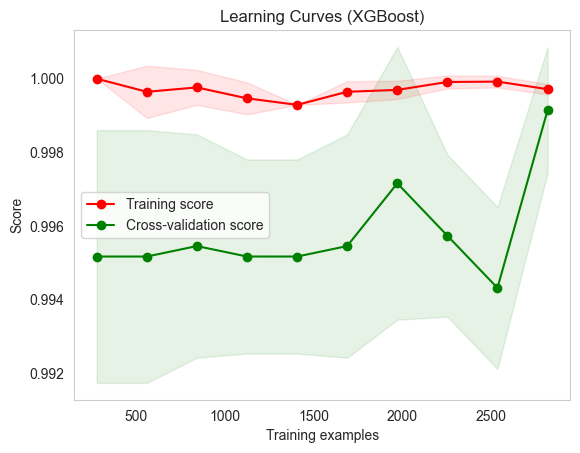

In [41]:
# Plot the learning curves, To compare the train score and cross-validation score
from sklearn.model_selection import learning_curve

# Initialize and train the final model (if not already done)
final_model = XGBClassifier(random_state=42)  # Or use your desired hyperparameters
final_model.fit(X_train, y_train)

train_sizes, train_scores, test_scores = learning_curve(
    final_model, X, y, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10)
)

plt.figure()
plt.title("Learning Curves (XGBoost)")
plt.xlabel("Training examples")
plt.ylabel("Score")

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()

In [42]:
import pickle

# Save the trained XGBoost model
model_filename = "xgboost_model.pkl"

with open(model_filename, "wb") as file:
    pickle.dump(xgb_model, file)

print(f"Model saved as {model_filename}")

Model saved as xgboost_model.pkl
